In [4]:
import drawSvg as draw
import numpy as np

In [5]:
# Good 16:9 size for slides
w = 2400
h = 1350

In [6]:
def draw_points(points):
    d = draw.Drawing(w, h, origin=(0, 0), displayInline=True)
    for point in list(points):
        x, y = map(int, point)
        print(x, y)

        d.append(
            draw.Circle(
                cx=x, cy=y, r=8, fill="white", stroke_width=4, stroke="black"
            )
        )
    d.setRenderSize(w, h)
    return d

In [7]:
# R2 sampling is from http://extremelearning.com.au/unreasonable-effectiveness-of-quasirandom-sequences/
class R2Sampler:
    def __init__(self, x_scale=1, y_scale=1, seed=0.5):
        self.x_scale = x_scale
        self.y_scale = y_scale

        # The plastic number, 1.32471…:
        g = ((9 + 69**0.5) / 18) ** (1 / 3) + ((9 - 69**0.5) / 18) ** (1 / 3)

        self.a1 = 1 / g
        self.a2 = 1 / (g**2)
        self.seed = seed
        self.n = 0

    def __iter__(self):
        return self

    def __next__(self):
        self.n += 1
        return self.nth(self.n)

    def nth(self, n):
        x = (self.seed + self.a1 * n) % 1
        y = (self.seed + self.a2 * n) % 1

        x *= self.x_scale
        y *= self.y_scale
        return (z for z in (x, y))

In [8]:
g = R2Sampler()
golden_points = list(list(g.nth(z)) for z in range(144))
golden_points

[[0.5, 0.5],
 [0.2548776662466927, 0.06984029099805333],
 [0.009755332493385449, 0.6396805819961064],
 [0.764632998740078, 0.20952087299415956],
 [0.5195106649867709, 0.7793611639922129],
 [0.27438833123346384, 0.3492014549902662],
 [0.029265997480155903, 0.9190417459883191],
 [0.7841436637268488, 0.48888203698637245],
 [0.5390213299735418, 0.05872232798442578],
 [0.29389899622023474, 0.6285626189824791],
 [0.04877666246692769, 0.19840290998053245],
 [0.8036543287136197, 0.7682432009785858],
 [0.5585319949603118, 0.33808349197663823],
 [0.31340966120700564, 0.9079237829746916],
 [0.0682873274536977, 0.4777640739727449],
 [0.8231649937003915, 0.04760436497079823],
 [0.5780426599470836, 0.6174446559688516],
 [0.33292032619377565, 0.1872849469669049],
 [0.08779799244046949, 0.7571252379649582],
 [0.8426756586871615, 0.32696552896301156],
 [0.5975533249338554, 0.8968058199610649],
 [0.35243099118054744, 0.46664611095911823],
 [0.1073086574272395, 0.036486401957171566],
 [0.8621863236739316

In [10]:
def scale_points(pts, w, h):
    pts = np.array(pts).swapaxes(0, 1)
    pts[0] *= w
    pts[1] *= h
    pts[1] = h - pts[1]
    pts = pts.astype(np.uint16).swapaxes(0, 1)
    return pts

pts = scale_points(golden_points, w, h)

pts = draw_points(pts)
#pts.savePng('slides/general/plain_golden_dots.png')

1200 675
611 1255
23 486
1835 1067
1246 297
658 878
70 109
1881 690
1293 1270
705 501
117 1082
1928 312
1340 893
752 124
163 705
1975 1285
1387 516
799 1097
210 327
2022 908
1434 139
845 720
257 1300
2069 531
1480 1112
892 342
304 923
2116 154
1527 735
939 1315
351 546
2162 1127
1574 357
986 938
398 169
2209 750
1621 1330
1033 561
444 1142
2256 372
1668 953
1079 184
491 765
2303 1345
1715 576
1126 1157
538 387
2350 968
1761 199
1173 780
585 10
2397 591
1808 1172
1220 402
632 983
43 214
1855 795
1267 25
678 606
90 1187
1902 417
1314 998
725 229
137 810
1949 40
1360 621
772 1202
184 432
1996 1013
1407 244
819 825
231 55
2042 636
1454 1217
866 447
277 1028
2089 259
1501 840
913 70
324 651
2136 1232
1548 462
959 1043
371 274
2183 855
1595 85
1006 666
418 1247
2230 477
1641 1058
1053 289
465 870
2276 100
1688 681
1100 1262
512 492
2323 1073
1735 304
1147 885
558 115
2370 696
1782 1277
1194 507
605 1088
17 319
1829 900
1240 130
652 711
64 1292
1875 523
1287 1103
699 334
111 915
1922 145
1334

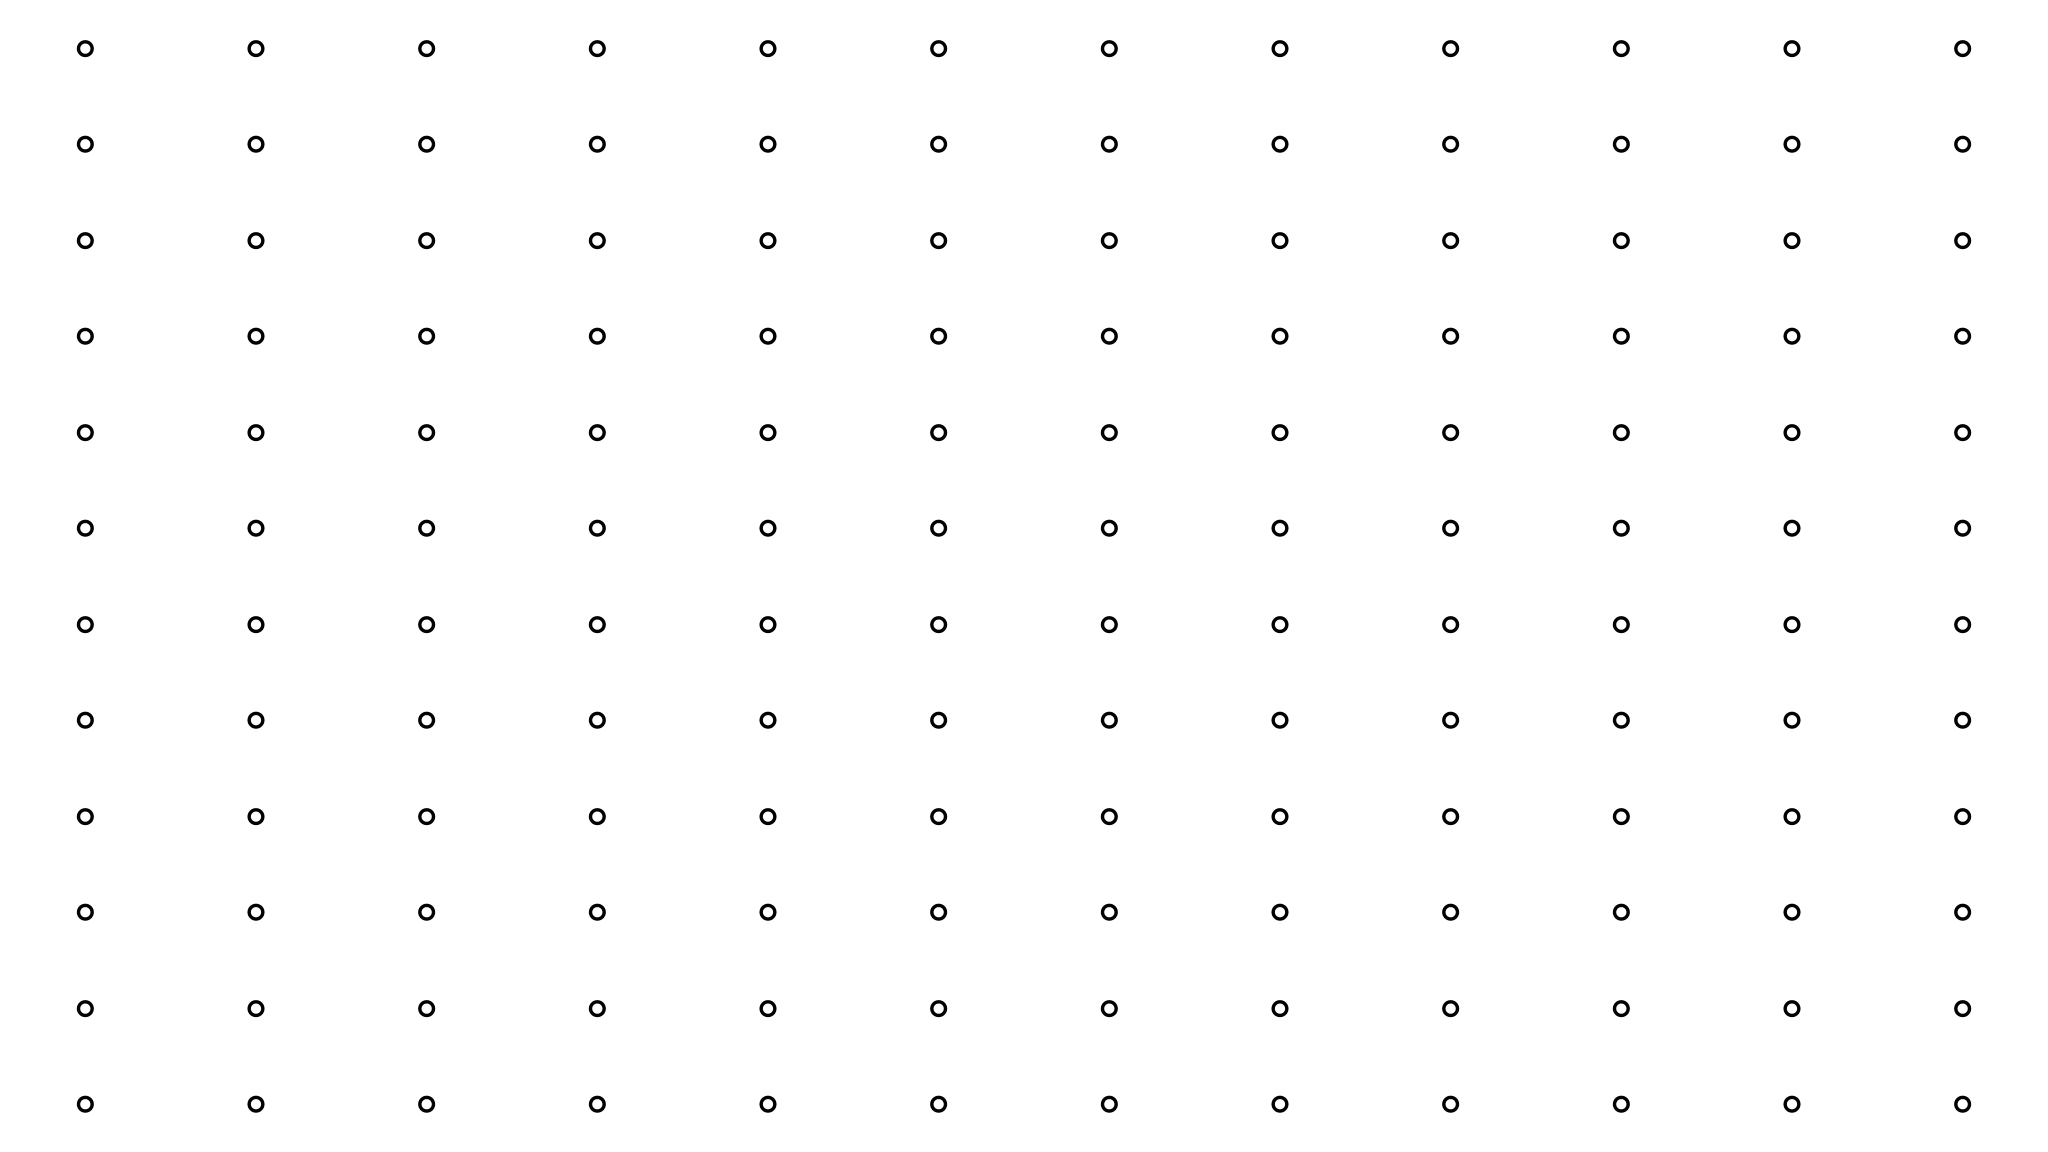

In [6]:
pts